In [66]:

import os
from pathlib import Path
import sys

PROJECT_ROOT = Path().resolve().parent   # notebooks -> racine
os.chdir(PROJECT_ROOT)                  # << clé : change le dossier courant
sys.path.insert(0, str(PROJECT_ROOT))

print("CWD:", Path.cwd())
print("PROJECT_ROOT:", PROJECT_ROOT)


CWD: C:\
PROJECT_ROOT: C:\


In [3]:
# Imports standards
import os
from pathlib import Path

# Data
import pandas as pd
import numpy as np

# Viz
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")



In [65]:
from src.config.load_config import load_config
from src.data.load_data import load_raw_data
from src.utils.seed import set_seed

config = load_config(str(PROJECT_ROOT / "config" / "config.yaml"))
set_seed(config["seed"])

df = load_raw_data(config)
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
df.shape

(2240, 29)

In [7]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [9]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [10]:
df["Income"].fillna(df["Income"].median(), inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_8688\2383243780.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Income"].fillna(df["Income"].median(), inplace=True)


In [11]:
df.isna().sum().sum()

np.int64(0)

In [12]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52237.975446,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25037.955891,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [13]:
df["Education"].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [14]:
df["Marital_Status"].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [15]:
df["Dt_Customer"].value_counts()

Dt_Customer
31-08-2012    12
12-05-2014    11
14-02-2013    11
12-09-2012    11
22-05-2014    10
              ..
01-11-2013     1
10-08-2013     1
11-10-2012     1
20-12-2012     1
09-01-2014     1
Name: count, Length: 663, dtype: int64

In [16]:
df["Dt_Customer"]= pd.to_datetime(df["Dt_Customer"], dayfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [17]:
df[ "Age" ]=2025 - df[ "Year_Birth" ]
df.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
324,2607,1953,Graduation,Single,40464.0,0,1,2013-01-11,78,424,...,0,0,0,0,0,0,3,11,0,72
96,7247,1960,Graduation,Widow,47916.0,0,1,2012-11-22,72,505,...,0,1,0,0,0,0,3,11,0,65
2104,5802,1972,Basic,Married,14188.0,0,0,2013-02-28,40,2,...,0,0,0,0,0,0,3,11,0,53
1259,2147,1969,Graduation,Together,76653.0,0,0,2013-08-16,91,736,...,0,0,1,1,0,0,3,11,0,56
1061,3759,1958,Graduation,Together,65196.0,0,2,2013-07-25,34,743,...,1,0,0,0,0,0,3,11,0,67


In [18]:
df[ "total_children" ] = df[ "Kidhome" ] + df[ "Teenhome" ]
df[ "total_children" ].value_counts()

total_children
1    1128
0     638
2     421
3      53
Name: count, dtype: int64

In [19]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'total_children'],
      dtype='object')

In [20]:
spend_cols = [ "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
df[ "total_spending" ] = df[ spend_cols ].sum(axis=1)
df[ "total_spending" ].describe()

count    2240.000000
mean      605.798214
std       602.249288
min         5.000000
25%        68.750000
50%       396.000000
75%      1045.500000
max      2525.000000
Name: total_spending, dtype: float64

In [21]:
df["since_customer"] = (pd.Timestamp("today") - df["Dt_Customer"]).dt.days
df["since_customer"].head(5)

0    4875
1    4325
2    4524
3    4351
4    4373
Name: since_customer, dtype: int64

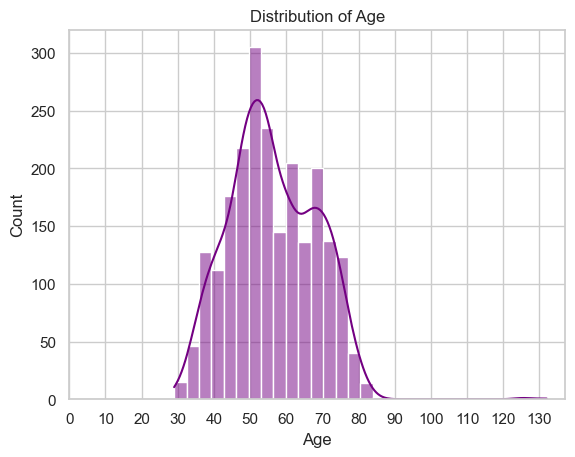

In [26]:
sns.histplot(x=df["Age"], bins=30, kde=True, color="#730082")
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.xticks(np.arange(0, df["Age"].max()+1, 10))
plt.show()


In [27]:
df["Income"].describe()

count      2240.000000
mean      52237.975446
std       25037.955891
min        1730.000000
25%       35538.750000
50%       51381.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64

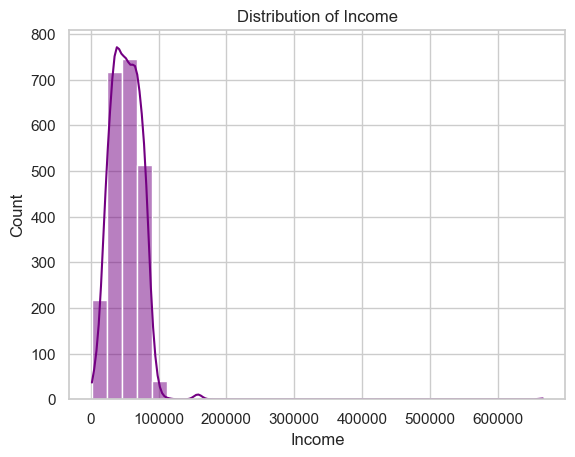

In [32]:
sns.histplot(x=df["Income"], bins=30, kde=True, color="#730082")
plt.title("Distribution of Income")
plt.xlabel("Income")
plt.ylabel("Count")
plt.show()

In [34]:
df["total_spending"].describe()

count    2240.000000
mean      605.798214
std       602.249288
min         5.000000
25%        68.750000
50%       396.000000
75%      1045.500000
max      2525.000000
Name: total_spending, dtype: float64

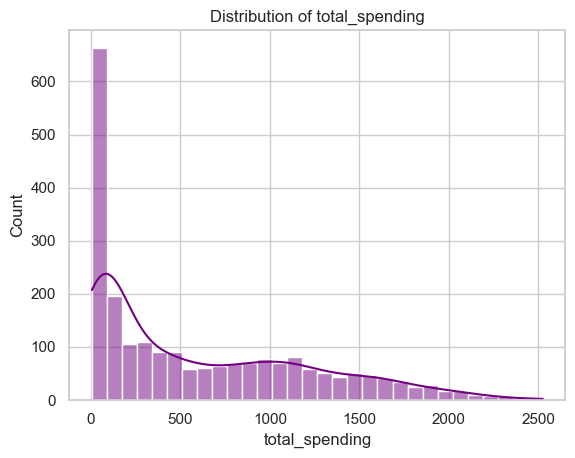

In [39]:
sns.histplot(data=df, x=df["total_spending"], bins=30, kde=True, color="#730082")
plt.title("Distribution of total_spending")
plt.xlabel("total_spending")
plt.ylabel("Count")

plt.show()

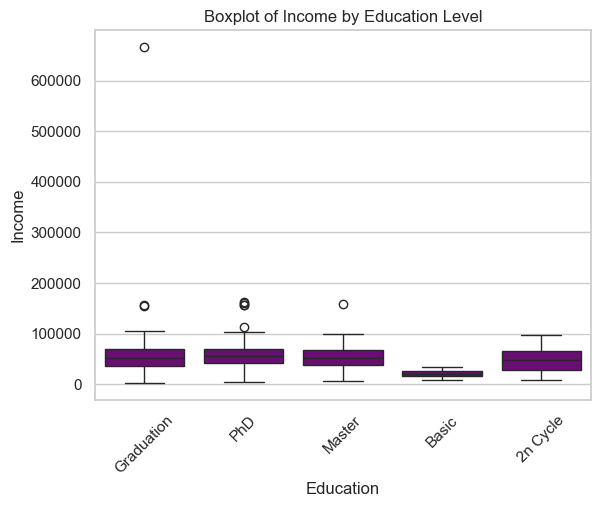

In [40]:
sns.boxplot(data=df, x="Education",y="Income",color="#730082")
plt.xticks(rotation=45)
plt.title("Boxplot of Income by Education Level")
plt.show()

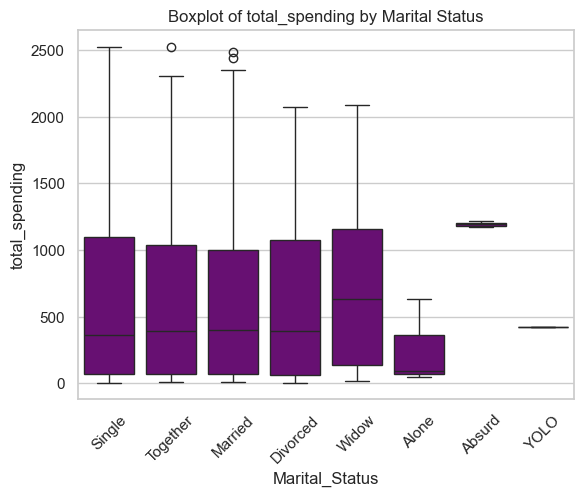

In [41]:
sns.boxplot(data=df, x="Marital_Status",y="total_spending",color="#730082")
plt.xticks(rotation=45)
plt.title("Boxplot of total_spending by Marital Status")
plt.show()

In [42]:
corr=['Income','total_spending','since_customer','Age','total_children','Recency','NumStorePurchases','NumWebPurchases']

In [43]:
corr

['Income',
 'total_spending',
 'since_customer',
 'Age',
 'total_children',
 'Recency',
 'NumStorePurchases',
 'NumWebPurchases']

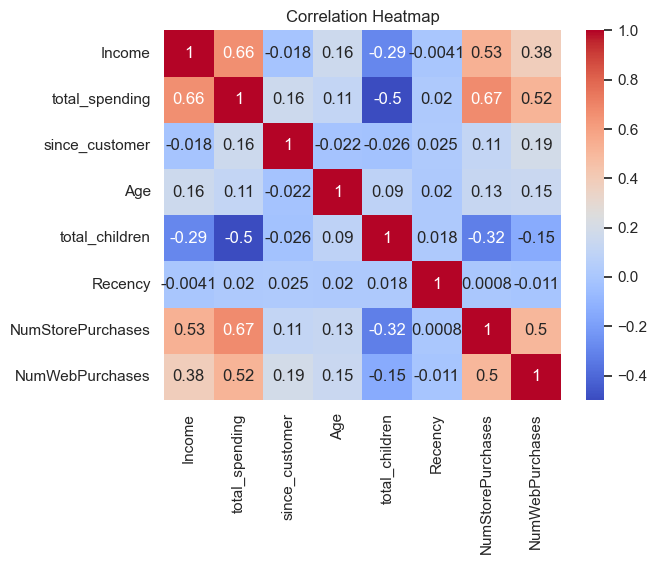

In [45]:
sns.heatmap(df[corr].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [46]:
pivot_income = df.pivot_table(values='Income', index='Education', columns='Marital_Status', aggfunc='mean')

In [47]:
pivot_income

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Education,,,,,,,,
2n Cycle,NaN,NaN,49395.130435,46265.055556,53611.986486,44852.991228,51392.200000,NaN
Basic,NaN,NaN,9548.000000,21960.500000,18238.666667,21240.071429,22123.000000,NaN
Graduation,79244.0,34176.0,54526.042017,50805.628176,51323.595238,55743.176573,54976.657143,NaN
Master,65487.0,61331.0,50331.945946,53286.028986,53530.560000,52081.556604,57816.541667,NaN
PhD,NaN,35860.0,53096.615385,58067.651042,53275.163265,56001.594017,60288.083333,48432.0


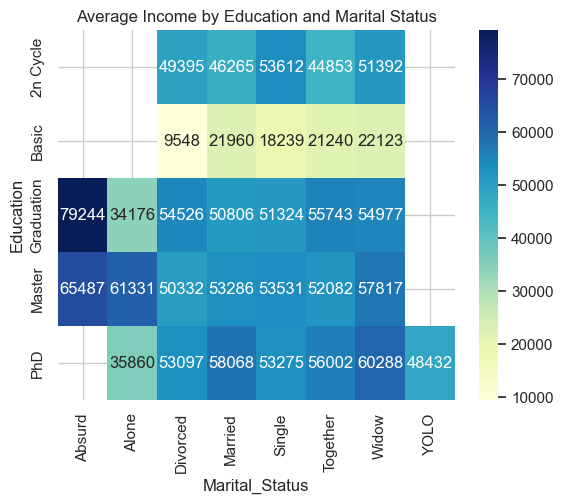

In [48]:
sns.heatmap(pivot_income, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title("Average Income by Education and Marital Status")
plt.show()

In [49]:
group1 = df.groupby('Education')['total_spending'].mean().sort_values(ascending=False)

In [50]:
group1


Education
PhD           672.409465
Graduation    619.898846
Master        611.781081
2n Cycle      496.527094
Basic          81.796296
Name: total_spending, dtype: float64

Text(0, 0.5, 'Average total_spending')

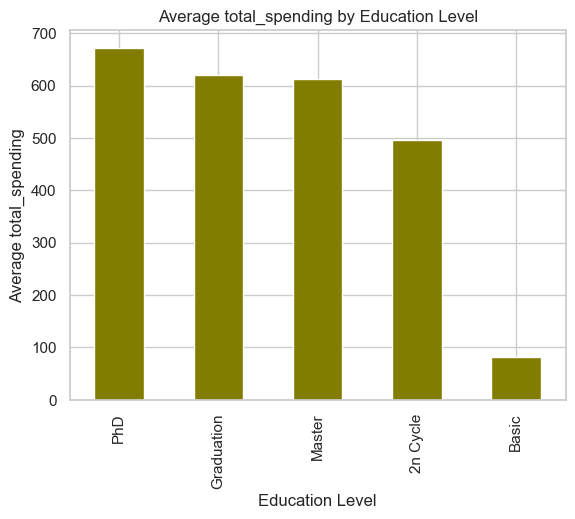

In [51]:
group1.plot(kind='bar', color="#827C00")
plt.title("Average total_spending by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Average total_spending")

In [52]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'total_children', 'total_spending', 'since_customer'],
      dtype='object')

In [53]:
df['AcceptedAny'] = df[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']].sum(axis=1)

In [54]:
df['AcceptedAny'].sample(5)

415     0
737     0
795     1
252     5
1852    0
Name: AcceptedAny, dtype: int64

In [55]:
df['AcceptedAny'] = df['AcceptedAny'].apply(lambda x: 1 if x > 0 else 0)

Text(0.5, 1.0, 'Proportion of Customers Who Accepted Any Campaign by Marital Status')

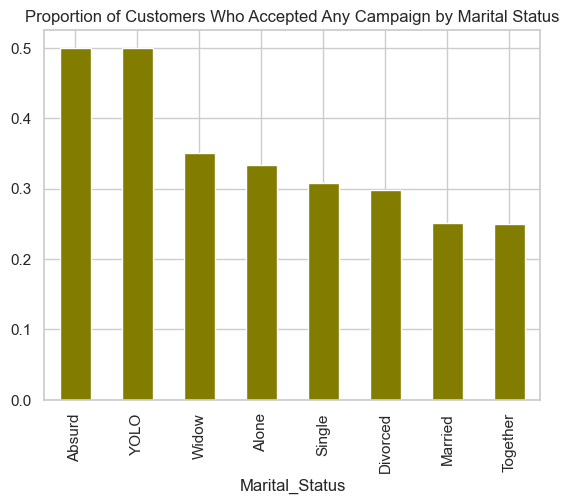

In [56]:
group2 = df.groupby('Marital_Status')['AcceptedAny'].mean().sort_values(ascending=False)
group2.plot(kind='bar', color="#827C00")
plt.title("Proportion of Customers Who Accepted Any Campaign by Marital Status")

In [57]:
bins = [18, 30, 40, 50, 60, 70, 90]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df['AgeGroup'].value_counts().sort_index()

AgeGroup
18-29      2
30-39    187
40-49    506
50-59    685
60-69    492
70+      365
Name: count, dtype: int64

In [58]:
group3 = df.groupby('AgeGroup')['Income'].mean().sort_index()

C:\Users\user\AppData\Local\Temp\ipykernel_8688\1375127634.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group3 = df.groupby('AgeGroup')['Income'].mean().sort_index()


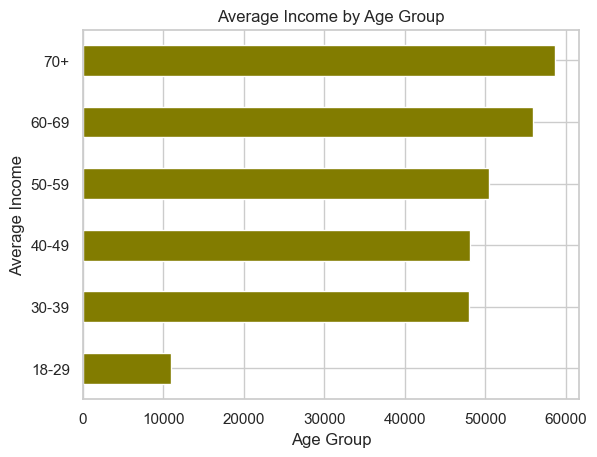

In [59]:
group3.plot(kind='barh', color="#827C00")
plt.title("Average Income by Age Group")
plt.ylabel("Average Income")
plt.xlabel("Age Group")
plt.show()

In [60]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'total_children', 'total_spending', 'since_customer',
       'AcceptedAny', 'AgeGroup'],
      dtype='object')

In [62]:
features_to_keep = ['Income', 'total_spending', 'since_customer', 'Age', 'total_children', 'Recency', 'NumStorePurchases', 'NumWebPurchases', 'AcceptedAny']

In [63]:
features_to_keep_df = df[features_to_keep]
features_to_keep_df.head(10)

,Income,total_spending,since_customer,Age,total_children,Recency,NumStorePurchases,NumWebPurchases,AcceptedAny
0,58138.0,1617,4875,68,0,58,4,8,1
1,46344.0,27,4325,71,2,38,2,1,0
2,71613.0,776,4524,60,0,26,10,8,0
3,26646.0,53,4351,41,1,26,4,2,0
4,58293.0,422,4373,44,1,94,6,5,0
5,62513.0,716,4505,58,1,16,10,6,0
6,55635.0,590,4805,54,1,34,7,7,0
7,33454.0,169,4629,40,1,32,4,4,0
8,30351.0,46,4600,51,1,19,2,3,1
9,5648.0,49,4320,75,2,68,0,1,1
